<a href="https://colab.research.google.com/github/Rutuja31B/ProgrammingAssignment2/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**


## **TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

# **Author - Rutuja Bhagwat**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [8]:
#reading data
Data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## **DATA** **VISUALIZATION**

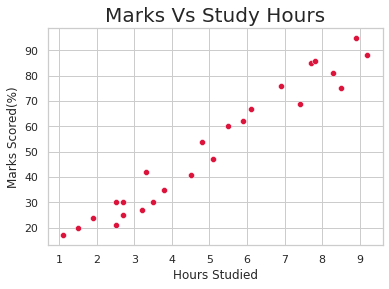

In [38]:
sns.set_style('whitegrid')
sns.scatterplot(y= Data['Scores'], x= Data['Hours'],color='crimson')
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Scored(%)', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

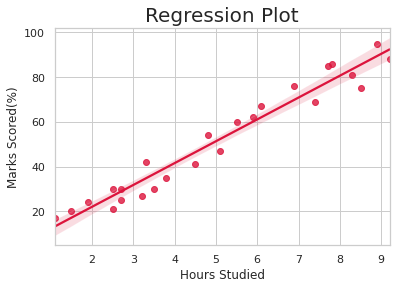

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [40]:
sns.regplot(x= Data['Hours'], y= Data['Scores'],color='crimson')
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Scored(%)', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(Data.corr())

# **Training the Model**

### **1)Splitting the Data**

In [23]:
# Defining X and y from the Data
X = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### **2)Data Fitting**

In [24]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Predicting the percentage of marks**

In [25]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


##**Comparing the Predicted Marks with the Actual Marks**

In [26]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


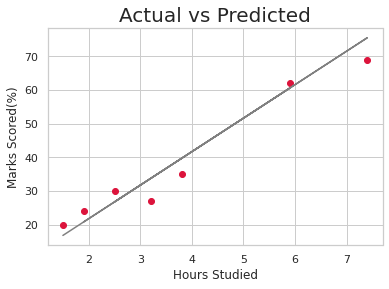

In [41]:
plt.scatter(x=val_X, y=val_y, color='crimson')
plt.plot(val_X, pred_y, color='grey')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Scored(%)', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


In [42]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


### Small value of absolute error states that chances of error or wrong forcastig are very less.

## **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [43]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
